## Exercise 8

In [25]:
import polars as pl
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

df = pl.read_csv('../data/sinusitis.csv')
# df.pivot('self_reported_improvement', 'group', 'self_reported_improvement', 'count', sort_columns=True)
t = sm.stats.Table.from_data(df.to_pandas())
t.table_orig

self_reported_improvement,no,yes
group,,
control,16,65
treatment,19,66


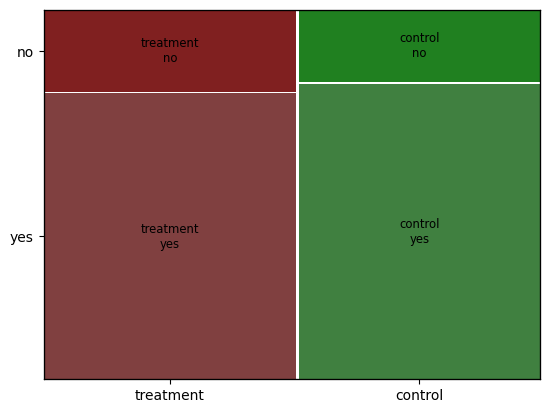

In [21]:
m = mosaic(df.to_pandas(), index=['group', 'self_reported_improvement'])

In [27]:
df.group_by(['group', 'self_reported_improvement'])\
  .agg(pl.count().alias('count'))\
  .with_columns((pl.col('count') * 100 / pl.sum('count')).over("group").round(2))

group,self_reported_improvement,count
str,str,f64
"""treatment""","""yes""",77.65
"""control""","""no""",19.75
"""treatment""","""no""",22.35
"""control""","""yes""",80.25


1. %77.65 in treatment group experienced improvement after 24 hrs.
2. %80.25 in control group experienced improvement after 24 hrs
3. Treatment
4. It might be up to chance.
5. * Explanatory: group
   * Response: self_reported_improvement